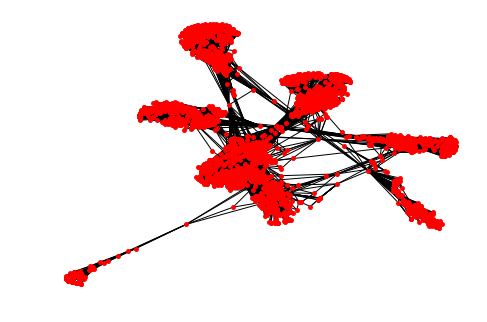

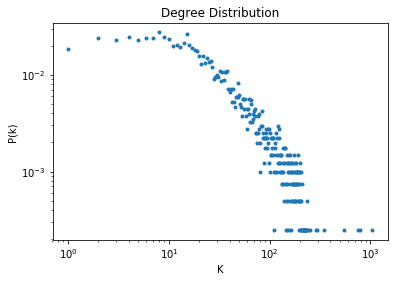

Calculating best minimal value for power law fit
C:\Users\joel.s.almeida\AppData\Local\Continuum\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\joel.s.almeida\AppData\Local\Continuum\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


average degree=  43.69101262688784
alpha=  2.531484466048424   sigma=  0.04331692204898798    xmin=  48.0   xmax=  None
clustering coeficient=  0.6055467186200876
average path length=  3.6925068496963913


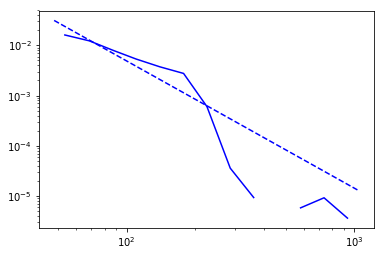

In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections as col
import powerlaw
import operator

with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip a line
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    nx.draw(G, node_size = 15)
    plt.show()
    
    average_degree = 2 * E / N
    clustering_coef = nx.average_clustering(G)
    average_path_length = nx.average_shortest_path_length(G)
    
    #transitivity = nx.transitivity(G)
    
    degree_sequence = sorted([d for n, d in G.degree()])  # degree sequence
    degreeCount = col.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    cnt_normalized = np.array(cnt) / N
    
    fig, ax = plt.subplots()
    plt.loglog(deg, cnt_normalized, marker='.', linestyle="None")
    
    plt.title("Degree Distribution")
    plt.ylabel("P(k)")
    plt.xlabel("K")
    
    plt.show()
    
    fit = powerlaw.Fit(np.array(degree_sequence)+1,discrete=True)
    fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
    fit.plot_pdf( color= 'b')
    
    print('average degree= ', average_degree)
    print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma, '   xmin= ', fit.power_law.xmin, '  xmax= ', fit.power_law.xmax)
    print('clustering coeficient= ', clustering_coef)
    #print('transitivity= ', transitivity)
    print('average path length= ', average_path_length)
    
    #betweenness_centrality_nodes = nx.betweenness_centrality(G)
    #sorted_bc = sorted(betweenness_centrality_nodes.items(), key=operator.itemgetter(1), reverse=True)
    #most_important = [i[0] for i in sorted_bc[0:4]]
    
    # Code to show the graph with the most important nodes highlighted
    
    '''color_map = []
    node_sizes = []

    for node in G:
        if node == 1912:
            color_map.append('red')
            node_sizes.append(30)
        else:
            color_map.append('green')
            node_sizes.append(15)
    nx.draw(G,node_color = color_map, node_size = node_sizes)
    plt.show()
'''

In [ ]:
G2 = nx.extended_barabasi_albert_graph(N, 22, 0.9, 0, seed=1)

clustering_coef2 = nx.average_clustering(G2)
average_path_length2 = nx.average_shortest_path_length(G2)

print('clustering coeficient= ', clustering_coef2)
#print('transitivity= ', transitivity)
print('average path length= ', average_path_length2)